# Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import geopandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Cleansing

In [2]:
df_price = pd.read_csv('C:\\Users\\lzh-a\\Desktop\\DA\\melb_data.csv')

In [3]:
df_price.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df_price.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
df_price.fillna('Unknown', inplace = True)

In [8]:
df_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,Unknown,Unknown,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,Unknown,Unknown,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,Unknown,1981.0,Unknown,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,Unknown,1997.0,Unknown,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western Metropolitan,6380.0


In [9]:
df_price.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
df_price['Suburb'] = df_price['Suburb'].str.upper()

In [11]:
df_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,ABBOTSFORD,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,Unknown,Unknown,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,ABBOTSFORD,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,ABBOTSFORD,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,ABBOTSFORD,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,Unknown,Unknown,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,ABBOTSFORD,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,WHEELERS HILL,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,Unknown,1981.0,Unknown,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,WILLIAMSTOWN,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,Unknown,-37.85927,144.87904,Western Metropolitan,6380.0
13577,WILLIAMSTOWN,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,Unknown,1997.0,Unknown,-37.85274,144.88738,Western Metropolitan,6380.0
13578,WILLIAMSTOWN,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,Unknown,-37.85908,144.89299,Western Metropolitan,6380.0


In [12]:
df_price[['Day', 'Month', 'Year']] = df_price['Date'].str.split('/', n = 2, expand = True)
df_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Month,Year
0,ABBOTSFORD,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Unknown,Unknown,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3,12,2016
1,ABBOTSFORD,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,4,02,2016
2,ABBOTSFORD,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,4,03,2017
3,ABBOTSFORD,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Unknown,Unknown,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,4,03,2017
4,ABBOTSFORD,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,4,06,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,WHEELERS HILL,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,Unknown,1981.0,Unknown,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,26,08,2017
13576,WILLIAMSTOWN,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,133.0,1995.0,Unknown,-37.85927,144.87904,Western Metropolitan,6380.0,26,08,2017
13577,WILLIAMSTOWN,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,Unknown,1997.0,Unknown,-37.85274,144.88738,Western Metropolitan,6380.0,26,08,2017
13578,WILLIAMSTOWN,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,157.0,1920.0,Unknown,-37.85908,144.89299,Western Metropolitan,6380.0,26,08,2017


In [13]:
location = geopandas.read_file('C:\\Users\\lzh-a\\Desktop\\SourceCode\\suburb-10-vic.geojson')

In [14]:
location

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2969,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,"POLYGON ((144.86758 -37.67103, 144.86630 -37.6..."
2969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2970,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,"POLYGON ((144.80472 -37.66949, 144.80353 -37.6..."
2970,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2971,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.18947 -38.4..."
2971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2972,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.19624 -38.3..."


<AxesSubplot:>

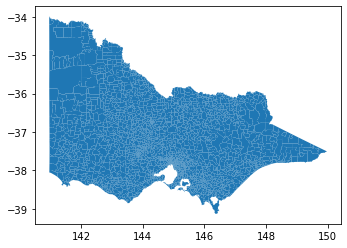

In [15]:
location.plot()

In [16]:
location.rename(columns = {'vic_loca_2':'Suburb'}, inplace = True)

In [17]:
df_price_suburb_count = df_price.groupby(['Suburb'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')
df_price_suburb_count

,Suburb,Count
0,RESERVOIR,359
1,RICHMOND,260
2,BENTLEIGH EAST,249
3,PRESTON,239
4,BRUNSWICK,222
...,...,...
309,ATTWOOD,1
310,BEACONSFIELD UPPER,1
311,BACCHUS MARSH,1
312,SANDHURST,1


In [18]:
loc_join = location.merge(df_price_suburb_count, on = 'Suburb', how = 'left')
loc_join

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,Suburb,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry,Count
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0...",NaN
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3...",NaN
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9...",NaN
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6...",NaN
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2969,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,"POLYGON ((144.86758 -37.67103, 144.86630 -37.6...",NaN
2969,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2970,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,"POLYGON ((144.80472 -37.66949, 144.80353 -37.6...",NaN
2970,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2971,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.18947 -38.4...",NaN
2971,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2972,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,"POLYGON ((145.19240 -38.40087, 145.19624 -38.3...",NaN


In [19]:
loc_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2973 entries, 0 to 2972
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          2973 non-null   object  
 1   lc_ply_pid  2973 non-null   object  
 2   dt_create   2973 non-null   object  
 3   dt_retire   0 non-null      object  
 4   loc_pid     2973 non-null   object  
 5   vic_locali  2973 non-null   object  
 6   vic_loca_1  0 non-null      object  
 7   Suburb      2973 non-null   object  
 8   vic_loca_3  0 non-null      object  
 9   vic_loca_4  31 non-null     object  
 10  vic_loca_5  2973 non-null   object  
 11  vic_loca_6  0 non-null      object  
 12  vic_loca_7  2973 non-null   object  
 13  geometry    2973 non-null   geometry
 14  Count       316 non-null    float64 
dtypes: float64(1), geometry(1), object(13)
memory usage: 371.6+ KB


<AxesSubplot:>

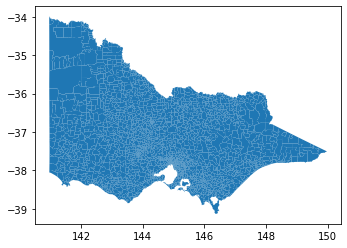

In [20]:
loc_join.plot()

(-38.2, -37.3)

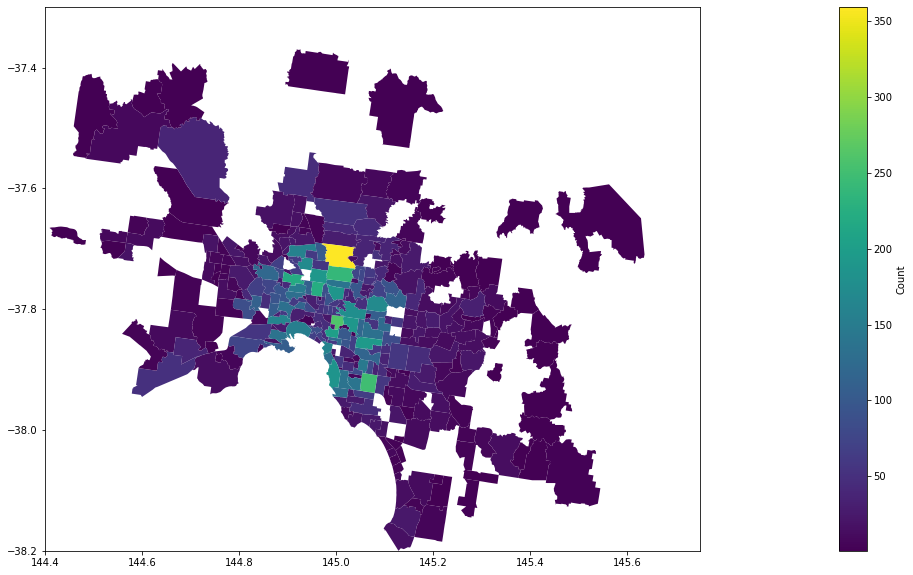

In [21]:
fig_leg, ax_leg = plt.subplots(figsize = (50, 10))
loc_join.plot(column = 'Count', ax = ax_leg, legend = True, legend_kwds = {'label':'Count', 'orientation':'vertical'})
plt.xlim(144.4, 145.75)
plt.ylim(-38.2, -37.3)

# Data Visualization

## 1. Overview

<AxesSubplot:>

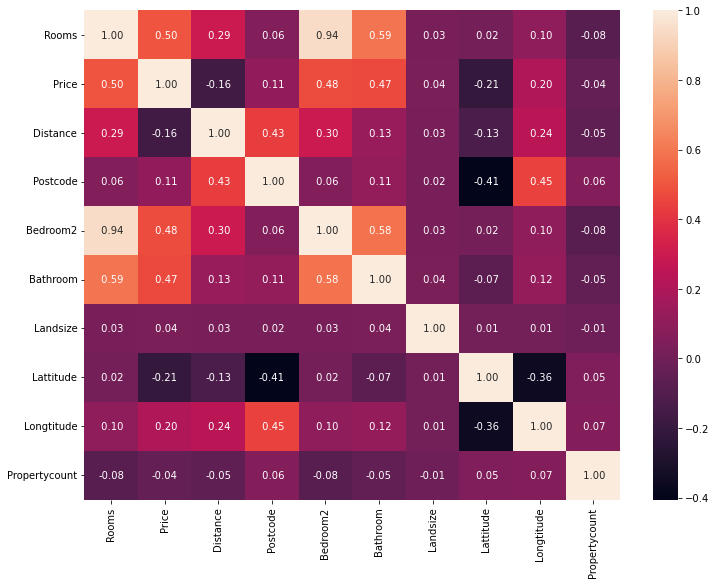

In [22]:
fig, axs = plt.subplots(figsize = (12,9))
sns.heatmap(df_price.corr(), annot = True, fmt = ' .2f')

#### Conclusion: From the Price respective, the correlation between Price and Rooms is the highest, hence, the relationship between Price and Rooms will be explored in the next section.

## 2. Price

### 2.1 Price and Rooms

Text(0, 0.5, 'Price')

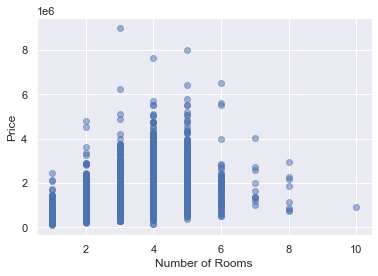

In [23]:
sns.set_theme(style = 'darkgrid')
plt.scatter(x = df_price['Rooms'], y = df_price['Price'], alpha = 0.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Price')

#### Conclusion: The highest prices are gathered in 3 to 6 rooms.

### 2.2 Median price distribution

In [24]:
df_price_median = df_price.groupby(['Suburb'])['Price'].agg('median').sort_values(ascending = False).reset_index(name = 'Median')
df_price_median

,Suburb,Median
0,KOOYONG,2185000.0
1,EAGLEMONT,1901000.0
2,ALBERT PARK,1900000.0
3,CANTERBURY,1890000.0
4,MIDDLE PARK,1880000.0
...,...,...
309,MELTON SOUTH,390000.0
310,WALLAN,366000.0
311,KURUNJANG,353500.0
312,ROCKBANK,340000.0


<AxesSubplot:xlabel='Median', ylabel='Count'>

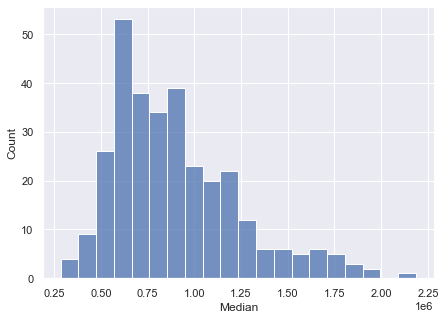

In [25]:
fig, axs = plt.subplots(figsize = (7,5))
sns.histplot(df_price_median['Median'], palette = 'light:m_r', bins = 20)

#### Conclusion: Most of the median price falls into 0.5M to 1M.

### 2.3 Price Distribution

<AxesSubplot:xlabel='Price', ylabel='Density'>

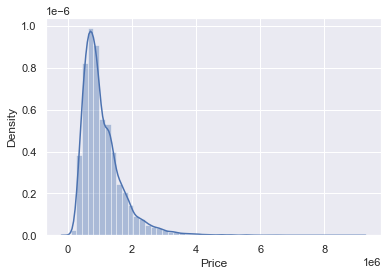

In [26]:
sns.distplot(df_price['Price'])

In [27]:
df_price['Price'].skew()

2.239624312529873

In [28]:
df_price['Price'].kurt()

9.87433888590604

#### Conclusion: The distribution of the price is not normalized.

### 2.4 Price Normalization

In [29]:
df_price['Price'] = np.log(df_price['Price'])

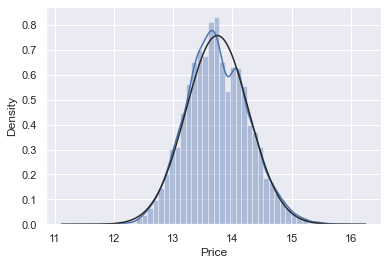

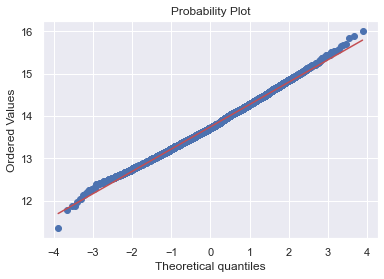

In [30]:
sns.distplot(df_price['Price'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_price['Price'], plot = plt)

#### Conclusion: The price can be normalized.

## 3. Suburb

### 3.1 Top 10 Listed Suburbs

In [31]:
df_price_suburb_count = df_price.groupby(['Suburb'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')
df_price_suburb_count

,Suburb,Count
0,RESERVOIR,359
1,RICHMOND,260
2,BENTLEIGH EAST,249
3,PRESTON,239
4,BRUNSWICK,222
...,...,...
309,ATTWOOD,1
310,BEACONSFIELD UPPER,1
311,BACCHUS MARSH,1
312,SANDHURST,1


Text(0.5, 0, 'Count')

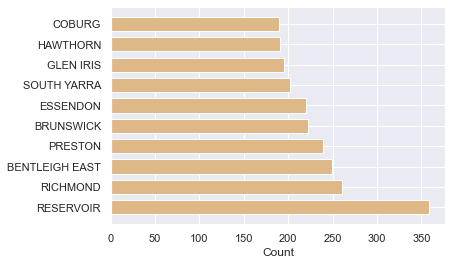

In [32]:
plt.barh(df_price_suburb_count['Suburb'][:10], df_price_suburb_count['Count'][:10], height = 0.7, color = 'burlywood')
plt.xlabel('Count')

### 3.2 Top 10 Expensive Suburbs

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

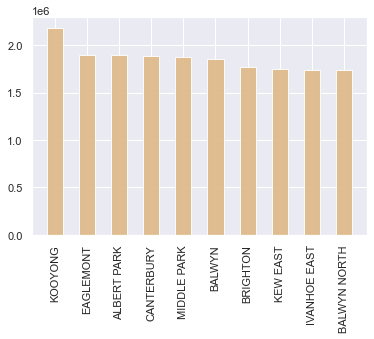

In [33]:
plt.bar(df_price_median['Suburb'][:10], df_price_median['Median'][:10], alpha = 0.9, width = 0.5, color = 'burlywood')
plt.xticks(rotation = 90)

### 3.3 Top 10 Suburbs Landsize

In [34]:
df_price_land = df_price.groupby(['Suburb'])['Landsize'].agg('mean').sort_values(ascending = False).reset_index(name = 'Avgsize')
df_price_land

,Suburb,Avgsize
0,SILVAN,57245.000000
1,NEW GISBORNE,44500.000000
2,GISBORNE,8437.875000
3,FITZROY,7965.508475
4,BULLENGAROOK,4000.000000
...,...,...
309,WEST MELBOURNE,168.258065
310,SOUTH MELBOURNE,164.576471
311,CREMORNE,127.120000
312,WONGA PARK,0.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

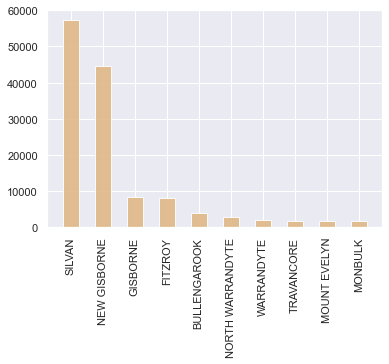

In [35]:
plt.bar(df_price_land['Suburb'][:10], df_price_land['Avgsize'][:10], alpha = 0.9, width = 0.5, color = 'burlywood')
plt.xticks(rotation = 90)

In [36]:
df_price_high = df_price.groupby(['Suburb'])['Price'].agg('max').sort_values(ascending = False).reset_index(name = 'HighPrice')
df_price_high

,Suburb,HighPrice
0,MULGRAVE,16.012735
1,CANTERBURY,15.894952
2,HAWTHORN,15.850216
3,KEW,15.687313
4,MIDDLE PARK,15.671809
...,...,...
309,BROOKFIELD,13.030248
310,KURUNJANG,12.834681
311,WALLAN,12.810389
312,ROCKBANK,12.736701


In [37]:
df_price_low = df_price.groupby(['Suburb'])['Price'].agg('min').sort_values(ascending = False).reset_index(name = 'LowPrice')
df_price_low

,Suburb,LowPrice
0,PRINCES HILL,14.247293
1,NEW GISBORNE,14.119312
2,KOOYONG,14.070153
3,WATERWAYS,14.024149
4,SILVAN,13.883169
...,...,...
309,HAWTHORN,11.982929
310,COBURG,11.884489
311,ALBION,11.884489
312,CAULFIELD,11.782953
